# Amazon Products Data

First of all we have to specify what mean all the columns.

- unique_id - Unique identifier of a product (Not useful for data analysis)
- product_name - Name of the product. Regular categorical variable.
- manufacturer - Name of the manufacurer. Regular categorical variable.
- price - Price of the product in GBP. Numerical variable.
- number_of_reviews - Numerical variable.
- number_of_answered_questions - Numerical variable.
- average_review_rating - Numerical variable.
- amazon_category_and_sub_category - Category variable.

The problem that I am trying to solve is: **"What can a seller do to get the best rating?"**.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First we specify which columns may be useful for our analysis. There is a lot of blank cols that's why we have to drop them and select the ones that are valid.

In [87]:
cols = ["manufacturer", "price", "number_available_in_stock", "number_of_reviews", "number_of_answered_questions", "average_review_rating"]
data = pd.read_csv("Amazon_Products.csv", usecols=cols)

/var/folders/sn/9k1r60m16tl0pqjy83j24x940000gn/T/ipykernel_46383/2582466896.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Amazon_Products.csv", usecols=cols)


# Cleaning data

### Price

In [88]:
data.dropna(subset=["price"], inplace=True)

def cleanPrice(price):
    return price.split(" ")[0][1:]

data["price"] = data["price"].transform(cleanPrice)
data["price"] = pd.to_numeric(data["price"], errors='coerce')
data["price"].dropna(inplace=True)

### Manufacturer

In [89]:
print("Number of NaN values: ", data.manufacturer[data.manufacturer == np.NaN].count())
data.manufacturer = data.manufacturer.astype("string")
data.manufacturer.head()

Number of NaN values:  0


0       Hornby
1    FunkyBuys
2          ccf
3       Hornby
4       Hornby
Name: manufacturer, dtype: string

### Number available in stock

In [90]:
def cleanAvailable(item):
    if item != "0":
        try:
            return int(item.split("\xa0")[0])
        except Exception:
            return 0
    return 0

data["number_available_in_stock"].fillna("0", inplace=True)
data["number_available_in_stock"] = data["number_available_in_stock"].transform(cleanAvailable)
data["number_available_in_stock"]

0         5
1         0
2         2
3         0
4         0
         ..
9999      5
10000     0
10001     3
10002     3
10003    31
Name: number_available_in_stock, Length: 8567, dtype: int64

### Average Review Rating

In [91]:
# Remove all values that don't match the pattern
exp = "^\d.\d out of 5 stars$"

data.drop(data[data["average_review_rating"].str.contains(exp).fillna(False).astype(bool).transform(lambda i: not i)].index, inplace=True)

In [92]:
# Change type to float32
data["average_review_rating"] = data["average_review_rating"].transform(lambda rev: rev[:3])
data["average_review_rating"] = data["average_review_rating"].astype("float32", copy=False)
data["average_review_rating"]

0        4.9
1        4.5
2        3.9
3        5.0
4        4.7
        ... 
9999     5.0
10000    4.0
10001    5.0
10002    5.0
10003    4.5
Name: average_review_rating, Length: 8550, dtype: float32

### Number of answered questions

In [93]:
data["number_of_answered_questions"] = data["number_of_answered_questions"].astype("float32")
data["number_of_answered_questions"]

0        1.0
1        1.0
2        2.0
3        2.0
4        2.0
        ... 
9999     3.0
10000    3.0
10001    3.0
10002    3.0
10003    3.0
Name: number_of_answered_questions, Length: 8550, dtype: float32

### Number of reviews

In [94]:
data["number_of_reviews"] = pd.to_numeric(data["number_of_reviews"], errors='coerce')
data["number_of_reviews"].dropna(inplace=True)
data["number_of_reviews"]

0        15.0
1         2.0
2        17.0
3         1.0
4         3.0
         ... 
9999      3.0
10000     1.0
10001     1.0
10002     1.0
10003    11.0
Name: number_of_reviews, Length: 8550, dtype: float64

In [95]:
data.reset_index(inplace=True)

# Prices

First numerical variable that can analized is price, but first we have to clean it.

In [96]:
price = data.price
price.dropna(inplace=True)
price.describe()

count    8549.000000
mean       19.982176
std        38.276599
min         0.010000
25%         4.990000
50%        10.580000
75%        19.990000
max       995.110000
Name: price, dtype: float64

Text(0.5, 0, 'Price (GBP)')

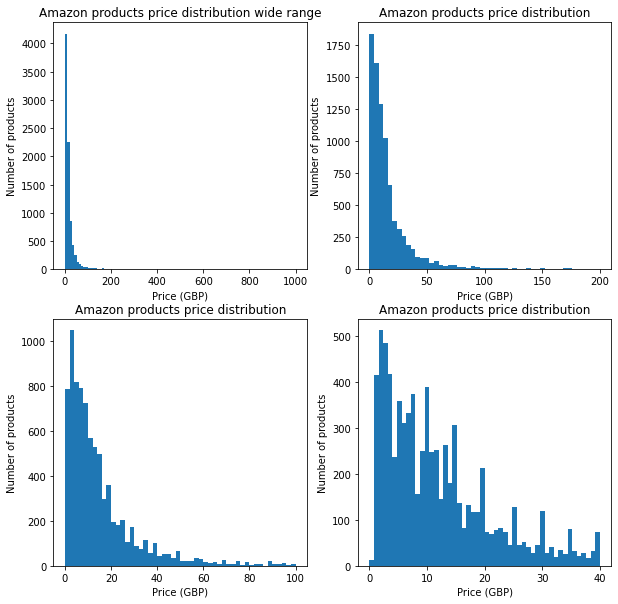

In [97]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.hist(price, bins=100, range=(0, 1000))
ax1.set_title("Amazon products price distribution wide range")
ax1.set_ylabel("Number of products")
ax1.set_xlabel("Price (GBP)")

ax2.hist(price, bins=50, range=(0, 200))
ax2.set_title("Amazon products price distribution")
ax2.set_ylabel("Number of products")
ax2.set_xlabel("Price (GBP)")

ax3.hist(price, bins=50, range=(0, 100))
ax3.set_title("Amazon products price distribution")
ax3.set_ylabel("Number of products")
ax3.set_xlabel("Price (GBP)")

ax4.hist(price, bins=50, range=(0, 40))
ax4.set_title("Amazon products price distribution")
ax4.set_ylabel("Number of products")
ax4.set_xlabel("Price (GBP)")


Most of the prices are less than 100.

In [98]:
print("Coefficient of variation: ", price.std() / price.mean() * 100)
print("Standard variation: ", price.std())
print("Interquantile range: ", price.quantile(0.75) - price.quantile(0.25))
print("Mode: ", price.mode())
print("Median: ", price.median())
print("Mean: ", price.mean())

Coefficient of variation:  191.55371134911562
Standard variation:  38.276599148364035
Interquantile range:  14.999999999999998
Mode:  0    9.99
Name: price, dtype: float64
Median:  10.58
Mean:  19.982175693063517


The coefficient variation tells us that the prices are very different. First quantile is 5 and third is 20 which means that most of the prices are in this range. Prices above 100 are exeptions.

In [99]:
print("Skewness: ", price.skew()) # Rightsided skewness
print("How strong is the skewness: ", price.skew() / price.std()) # Strong rightsided skewness

Skewness:  8.541878464321554
How strong is the skewness:  0.22316189667771566


(0.0, 200.0)

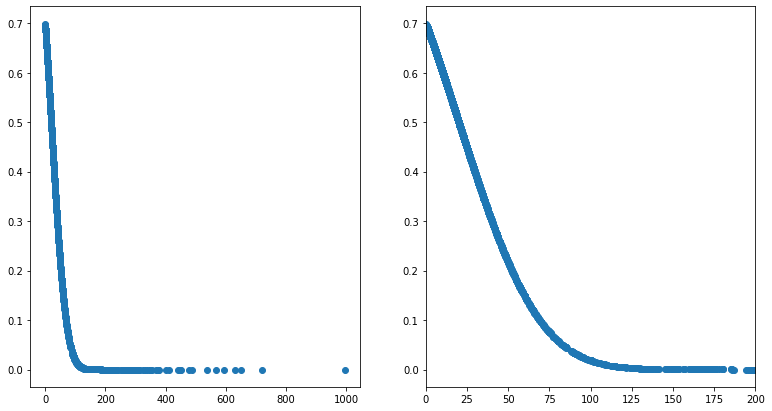

In [100]:
import scipy.stats as st

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

me = price.sum(min_count=0) / len(price)
ax1.scatter(price, 1 - st.norm.cdf((price - me) / price.std()))
ax2.scatter(price, 1 - st.norm.cdf((price - me) / price.std()))
ax2.set_xlim(0, 200)

### How much the distribution is similar to normal distribution

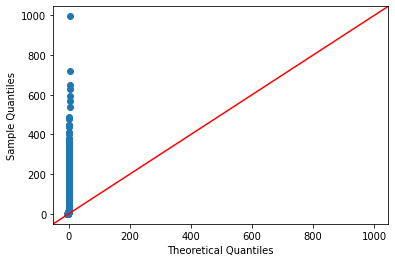

In [101]:
import statsmodels.api as sm

sm.qqplot(price, line='45')
plt.show()

In [102]:
stat, p = st.shapiro(price)

alpha = 0.05
if p > alpha:
    print("Sample similar to gausian")
else:
    print("Not similar to gausian")
print(stat, p)

Not similar to gausian
0.3985079526901245 0.0


/Users/dominikmatracki/MyProjects/DatasetAnalysis/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The distribution of variable price is not similar to gausian.